In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import dask.dataframe as dd
import hvplot.pandas
import hvplot.dask
plt.style.use('fivethirtyeight')


◼ Montar drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


◼ Definir separador e ler arquivo com Dask.

In [ ]:
df_weather = dd.read_csv('/content/drive/My Drive/IoT/Projeto_de_Bloco_IoT/weather_stations_inmet_brazil.csv', sep = ';', encoding="utf-8")
df_station = pd.read_csv('/content/drive/My Drive/IoT/Projeto_de_Bloco_IoT/automatic_stations_codes_2000_2021.csv', sep = ';', encoding="utf-8")

◼ Visualizar as 10 primeiras linhas

In [ ]:
df_weather.head(10)

,ESTACAO,DATA (YYYY-MM-DD),HORA (UTC),PRECIPITACAO TOTAL HORARIO (mm),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (W/m2),"TEMPERATURA DO AR - BULBO SECO, HORARIA (C)",TEMPERATURA DO PONTO DE ORVALHO (C),TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C),TEMPERATURA MINIMA NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIRECAO HORARIA (gr)","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,A001,2021-01-01,0,0.0,887.1,887.1,886.3,NaN,20.9,15.9,22.4,20.8,16.5,15.4,75.0,67.0,73.0,327.0,3.6,0.8
1,A001,2021-01-01,100,0.0,887.3,887.5,887.1,NaN,20.5,16.4,21.1,19.5,16.9,16.0,83.0,73.0,78.0,134.0,2.3,1.5
2,A001,2021-01-01,200,0.0,887.9,888.0,887.2,NaN,19.6,16.1,21.4,19.6,16.5,15.9,80.0,73.0,80.0,309.0,2.5,1.1
3,A001,2021-01-01,300,0.0,887.6,888.0,887.6,NaN,19.4,16.7,20.1,19.3,17.0,16.1,86.0,78.0,84.0,315.0,2.3,0.6
4,A001,2021-01-01,400,0.0,887.0,887.6,887.0,NaN,18.7,16.3,19.4,18.6,16.8,16.0,86.0,83.0,86.0,270.0,1.4,0.7
5,A001,2021-01-01,500,0.0,887.1,887.2,887.0,NaN,21.0,16.0,21.0,18.5,16.5,16.0,87.0,73.0,73.0,238.0,4.6,2.3
6,A001,2021-01-01,600,0.0,886.5,887.1,886.4,NaN,19.4,16.2,21.1,19.4,16.3,15.9,81.0,72.0,81.0,219.0,6.0,0.9
7,A001,2021-01-01,700,0.0,886.5,886.5,886.3,NaN,18.5,16.3,19.4,18.3,16.4,16.0,88.0,81.0,87.0,355.0,2.6,1.3
8,A001,2021-01-01,800,0.0,886.8,886.8,886.4,NaN,18.9,16.4,19.0,17.9,16.7,16.0,90.0,85.0,85.0,74.0,2.7,0.5
9,A001,2021-01-01,900,0.0,887.3,887.3,886.8,NaN,18.3,16.2,19.7,18.3,16.6,16.0,87.0,81.0,87.0,119.0,2.0,0.6


◼ Visualizar localizações das estações no Brasil

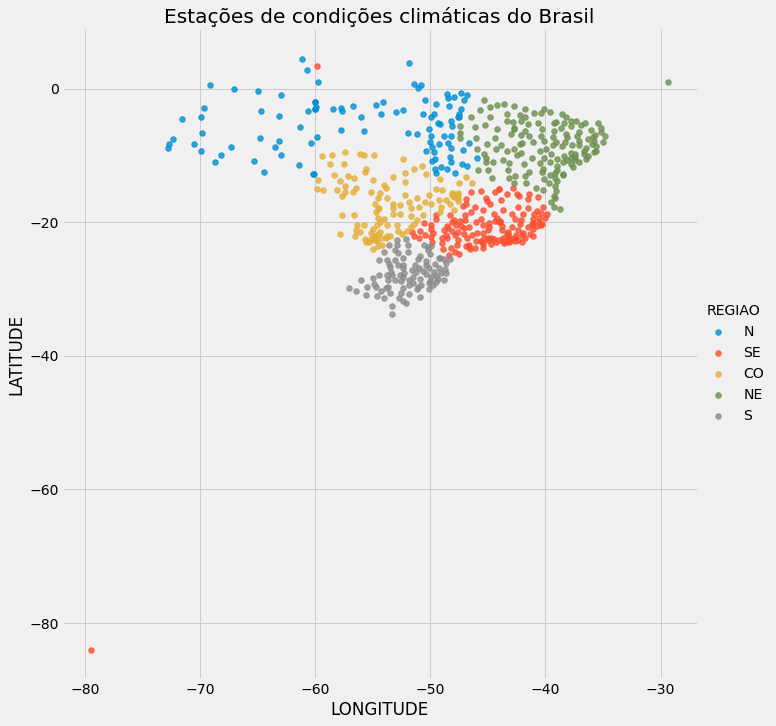

In [ ]:
g = sns.lmplot(x="LONGITUDE", y="LATITUDE", data=df_station,
           fit_reg=False, scatter_kws={"s": 30}, hue='REGIAO', height=10)
plt.title('Estações de condições climáticas do Brasil')
plt.show()

◼ Visualizar percentual de número de estações no brasil por altitude

In [ ]:
fig = px.pie(df_station, values=df_station['ALTITUDE'], names=df_station['UF'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

◼ Filtrar data set original pela estação: A00802 referente ao Rio Grande do Sul

In [ ]:
df_station_A802 = df_weather.loc[df_weather['ESTACAO'] == 'A802']

◼ **Fazendo uma exploração de dados simples por variáveis**


> Colunas importantes para previsão das condições climáticas

In [ ]:
columns_to_inspect = [
                      'DATA (YYYY-MM-DD)',
                      'UMIDADE RELATIVA DO AR, HORARIA (%)',
                      'VENTO, DIRECAO HORARIA (gr)',
                      'VENTO, RAJADA MAXIMA (m/s)',
                      'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'
                      ]

> Dropar dados nulos

In [ ]:
df_station_A802 = df_station_A802.dropna(subset=columns_to_inspect).compute()

> Resumo conciso do dataframe

In [ ]:
df_station_A802.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168408 entries, 388368 to 506570
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   ESTACAO                                                168408 non-null  object 
 1   DATA (YYYY-MM-DD)                                      168408 non-null  object 
 2   HORA (UTC)                                             168408 non-null  int64  
 3   PRECIPITACAO TOTAL HORARIO (mm)                        168408 non-null  float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  168408 non-null  float64
 5   PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        168408 non-null  float64
 6   PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       168408 non-null  float64
 7   RADIACAO GLOBAL (W/m2)                                 160817 non-null  float64
 8   TEMPERATURA DO AR - BULBO SEC

>  Pressão atmosferica ao nível da estação: *PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)*

In [ ]:
describe_stats_prs_at = df_station_A802['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'].describe().compute()
describe_stats_prs_at.round(2)

count    168408.00
mean       -262.96
std        3527.12
min       -9999.00
25%        1010.70
50%        1015.20
75%        1019.20
max        1037.10
Name: PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB), dtype: float64

> Temperatura do Ar: *TEMPERATURA DO AR - BULBO SECO, HORARIA (C)*

In [ ]:
describe_stats_temp_ar = df_station_A802['TEMPERATURA DO AR - BULBO SECO, HORARIA (C)'].describe()
describe_stats_temp_ar.round(2)

count    168408.00
mean      -1143.24
std        3207.66
min       -9999.00
25%          12.90
50%          18.00
75%          22.10
max          38.40
Name: TEMPERATURA DO AR - BULBO SECO, HORARIA (C), dtype: float64

> Umidade Relativa do Ar: *UMIDADE RELATIVA DO AR, HORARIA (%)*

In [ ]:
describe_stats_umidad = df_station_A802['UMIDADE RELATIVA DO AR, HORARIA (%)'].describe()
describe_stats_umidad.round(2)

count    168408.00
mean      -1539.50
std        3697.42
min       -9999.00
25%          58.00
50%          75.00
75%          86.00
max         100.00
Name: UMIDADE RELATIVA DO AR, HORARIA (%), dtype: float64

> Direção do vento: *VENTO, DIRECAO HORARIA (gr)*

In [ ]:
describe_stats_vent = df_station_A802['VENTO, DIRECAO HORARIA (gr)'].describe()
describe_stats_vent.round(2)

count    168408.00
mean      -1983.39
std        4129.94
min       -9999.00
25%          20.00
50%          83.00
75%         199.00
max         360.00
Name: VENTO, DIRECAO HORARIA (gr), dtype: float64

> Rajada do vento: *VENTO, RAJADA MAXIMA (m/s)*

In [ ]:
describe_stats_raj = df_station_A802['VENTO, RAJADA MAXIMA (m/s)'].describe()
describe_stats_raj.round(2)

count    168408.00
mean      -1927.01
std        3951.22
min       -9999.00
25%           2.60
50%           5.90
75%           8.50
max          30.60
Name: VENTO, RAJADA MAXIMA (m/s), dtype: float64

◼ Drop colunas

In [ ]:
drop_matching_columns = [
                         'PRECIPITACAO TOTAL HORARIO (mm)',
                         'RADIACAO GLOBAL (W/m2)',
                         'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (C)',
                         'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (C)',
                         'TEMPERATURA MAXIMA NA HORA ANT. (AUT) (C)',
                         'TEMPERATURA MINIMA NA HORA ANT. (AUT) (C)'
                         ]

In [ ]:
df_station_A802_droped = df_station_A802.drop(drop_matching_columns, axis=1).copy()


◼ Filtros e conversões

> Converter coluna: *DATA (YYYY-MM-DD)* para datetime

In [ ]:
df_station_A802_droped['DATA (YYYY-MM-DD)'] = dd.to_datetime(df_station_A802_droped['DATA (YYYY-MM-DD)'], unit='ns')

> Filtrando dataset apenas pelo ano de 2021

In [ ]:
df_filter_date = (df_station_A802_droped['DATA (YYYY-MM-DD)'] > '2020-12-31')
df_filter_date = df_station_A802_droped.loc[df_filter_date]

◼ Plot

Text(0, 0.5, 'Pressão atmosferica no ano de 2021')

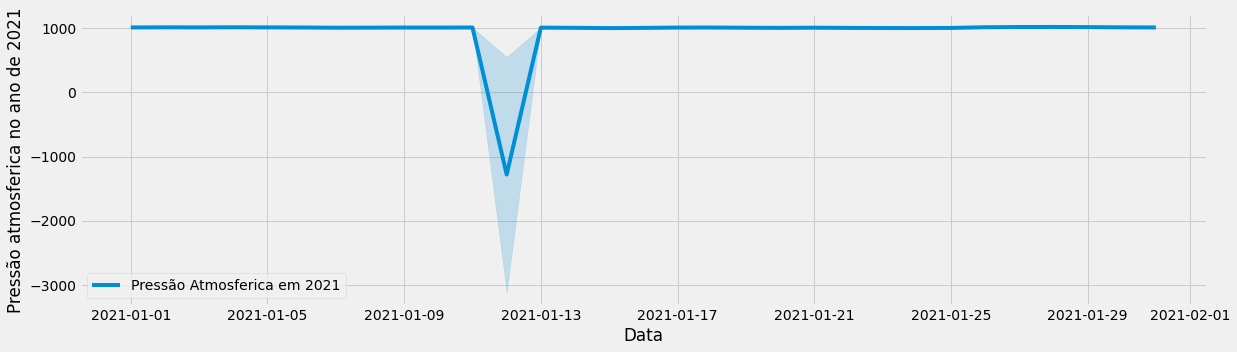

In [ ]:
plt.figure( figsize = (18, 5)) 
sns.lineplot(x='DATA (YYYY-MM-DD)', 
             y='PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 
             data=df_filter_date, 
             label='Pressão Atmosferica em 2021')
plt.xlabel('Data') 
plt.ylabel('Pressão atmosferica no ano de 2021') 

◼ Transferiando os dados processados para o destino data processed

In [ ]:
df_station_A802_droped.to_csv('station_A802.csv', encoding='utf-8')